<a href="https://colab.research.google.com/github/Angga-Luri/dataset/blob/main/vehicle_classifier_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
import os
import numpy as np

from tensorflow.keras import layers
from sklearn.metrics import classification_report,confusion_matrix

#Skimage
import skimage.io as io
from skimage.transform import  rescale,resize
from skimage import exposure
from skimage.util import img_as_uint,img_as_ubyte
from skimage.color import rgb2gray

#Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam


#Bayesian Optimization
!pip install bayesian-optimization
!pip install gpy
!pip install gpyopt
import GPy, GPyOpt

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.4/959.4 kB 48.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gpy: filename=GPy-1.10.0-cp310-cp310-linux_x86_64.whl size=3296983 sha256=39a951fb46277f5d9ad6c7d3d09b6b8846c261857599b461be956a5ea5a6fc0b
  Stored in directory: /root/.cache/pip/wheels/27/bd/9f/82ab4216eae088cba864ca0dc1d75699bd4bf6823790fb2f77
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102548 sha256=401d90939da695f5a5fd10b6160d1987baad61a2ee6e002d58fdcfcaa82ae2ac
  Stored in directory: /root/.cache/pip/wheels/d2/ef/9c/da9ceef7d0ff5287c24365844fc394852c2b79ac3fcf33bf8b
Successfully built gpy paramz
Looki

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# path_dataset_type5 = '/content/gdrive/My Drive/UNUSIDA/data_val/type5'
# path_dataset_preprocessing_type5 = '/content/gdrive/My Drive/UNUSIDA/data_val/type5'

In [ ]:
#==================================
#LOADING PROCESSED TRAINING DATA
#==================================

labels = ['type1', 'type2','type3','type4','type5']
img_size = 224
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join('/content/gdrive/My Drive/UNUSIDA/data_train', label) #YOUR DATA PATH
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = io.imread(os.path.join(path, img))
                img_gray = rgb2gray(img_arr)
                data.append([img_gray, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
#==================================
#LOADING PROCESSED VALIDATION DATA
#==================================

labels = ['type1', 'type2','type3','type4','type5']
img_size = 224
def get_dataval(data_dir):
    data = []
    for label in labels:
        path = os.path.join('/content/gdrive/My Drive/UNUSIDA/data_val', label) #YOUR DATA PATH
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = io.imread(os.path.join(path, img))
                img_gray = rgb2gray(img_arr)
                data.append([img_gray, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
#==================================
#LOADING PROCESSED TEST DATA
#==================================
labels = ['type1', 'type2','type3','type4','type5']
img_size = 224  #Por definir
def get_datatest(data_dir):
    data = []
    for label in labels:
        path = os.path.join('/content/gdrive/My Drive/UNUSIDA/data_test', label) #YOUR DATA PATH
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = io.imread(os.path.join(path, img))
                img_gray = rgb2gray(img_arr)
                data.append([img_gray, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
#Training set loading
train= get_data('/content/gdrive/My Drive/UNUSIDA/data_train')
#Validation set loading
val= get_dataval('/content/gdrive/My Drive/UNUSIDA/data_val')
# ls
test= get_datatest('/content/gdrive/My Drive/UNUSIDA/data_test')

In [ ]:
l=[]

for i in train:  #train, val or test
  # print (i)
  if (i[1]==0):
    l.append("type1")
  elif (i[1]==1):
    l.append("type2")
  elif (i[1]==2):
    l.append("type3")
  elif (i[1]==3):
    l.append("type4")
  elif (i[1]==4):
    l.append("type5")

sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
# sns.countplot(l)

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Found 400 files belonging to 5 classes.


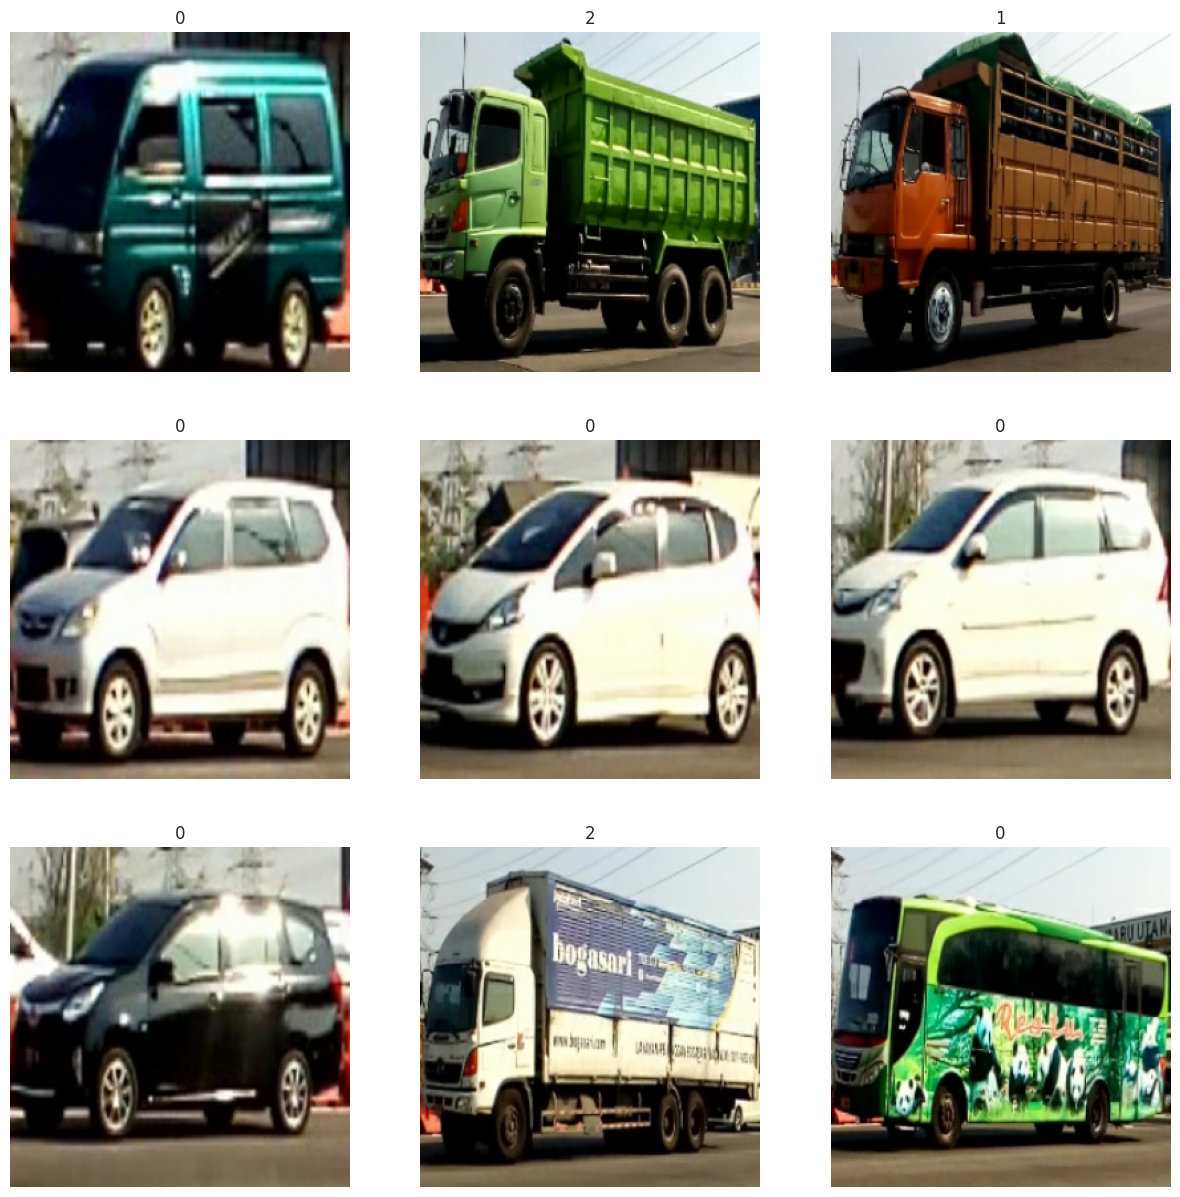

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/My Drive/UNUSIDA/data_train")
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

Text(0.5, 0.9, 'Golongan 3 (class = 2)')

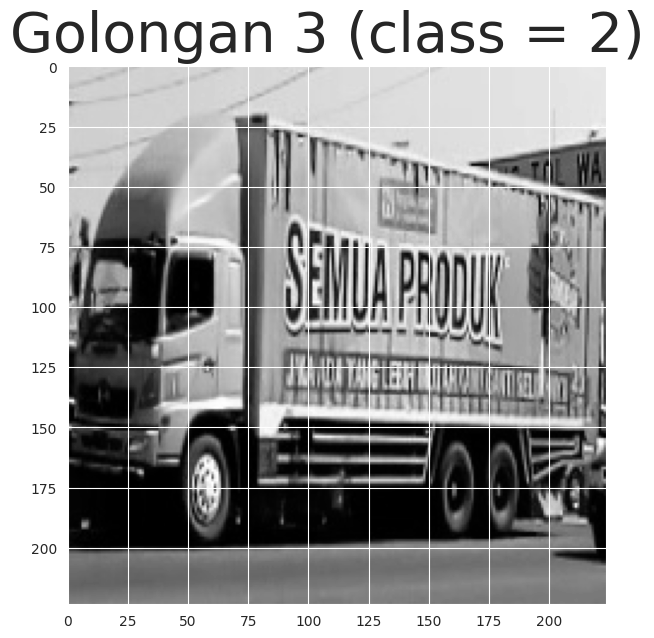

In [ ]:
#==================================================
#INVIDUAL LABEL VISUALIZATION
#==================================================

plt.figure(figsize = (7,7))
plt.imshow(train[220][0],cmap=plt.cm.gray)
plt.figtext(.5,.9,'Golongan 3 (class = 2)', fontsize=40, ha='center')

In [ ]:
x_train = [] #Samples
y_train = [] #Labels
# print ("x_train",x_train)
# print ("y_train",y_train)

x_val = []  #Samples
y_val = [] #Labels
# print ("x_val",x_val)
# print ("y_val",y_val)


x_test = []  #Samples
y_test = [] #Labels
# print ("x_test",x_test)
# print ("y_test",y_test)


#TRAINING SET SAMPLES AND LABELS CREATON

for feature, label in train:
  # print ("tess xtrain",x_train)
  x_train.append(feature)
  y_train.append(label)


#VALIDATION SET SAMPLES AND LABELS CREATION
for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

#TEST SET SAMPLES AND LABELS CREATION
for feature, label in test:
  x_test.append(feature)
  y_test.append(label)


# NORMALIZATION
x_train_normalized = np.array(x_train)/ 255
print (x_train_normalized)
x_val = np.array(x_val) / 255
x_test= np.array(x_test)/255

#LABELS OF EACH SET
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test= np.array(y_test)

[[[2.77473280e-03 2.68246059e-03 2.58907958e-03 ... 2.29799308e-03
   2.48253749e-03 2.72748789e-03]
  [2.75935409e-03 2.68246059e-03 2.60445829e-03 ... 2.32875048e-03
   2.51329489e-03 2.72748789e-03]
  [2.79011150e-03 2.72859669e-03 2.65059439e-03 ... 2.40564398e-03
   2.62094579e-03 2.81976009e-03]
  ...
  [1.48119493e-03 1.48119493e-03 1.48119493e-03 ... 1.45346867e-03
   1.45346867e-03 1.45346867e-03]
  [1.48119493e-03 1.48119493e-03 1.48119493e-03 ... 1.45346867e-03
   1.46884737e-03 1.46884737e-03]
  [1.48119493e-03 1.48119493e-03 1.48119493e-03 ... 1.45346867e-03
   1.46884737e-03 1.48422607e-03]]

 [[8.91669358e-04 2.37575855e-03 3.22158708e-03 ... 1.06614533e-03
   1.12766013e-03 1.16933026e-03]
  [9.07048058e-04 2.40651596e-03 3.23696578e-03 ... 9.79358708e-04
   1.03538793e-03 1.07705805e-03]
  [8.91669358e-04 2.42953941e-03 3.31496809e-03 ... 6.87163399e-04
   7.27813918e-04 7.58571319e-04]
  ...
  [1.88877509e-03 1.88877509e-03 1.88877509e-03 ... 1.93692272e-03
   1.94138

In [ ]:

from sklearn.decomposition import PCA
from sklearn.decomposition import PCA as RandomizedPCA
#HELPFUL RESOURCES: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

shape = x_train_normalized.shape
img_r = x_train_normalized.reshape((shape[0], shape[1] * shape[2])) #input 3D -> 2D reshape
X = img_r
pca = RandomizedPCA(150,copy=True, whiten=False, svd_solver='full', tol=0.0, iterated_power='auto', random_state=None)
pca.fit(X)

PCA(n_components=150, svd_solver='full')

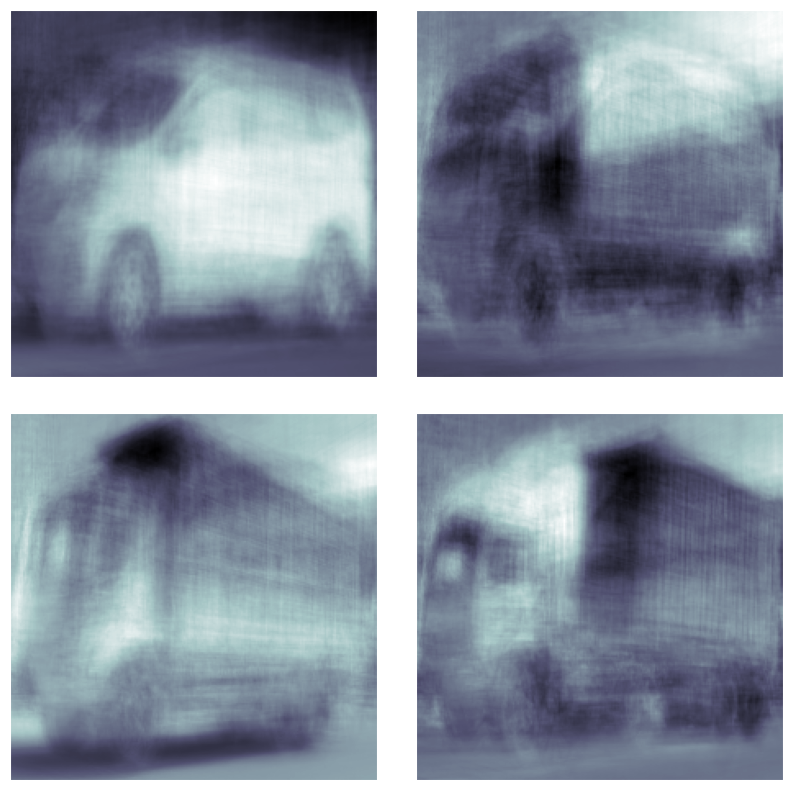

In [ ]:
#======================
#CXR EIGENVECTORS PLOT
#======================
fig, axes = plt.subplots(2, 2, figsize=(10,10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(224, 224), cmap='bone')

(array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9000000000000001, '0.9'),
  Text(0, 1.0, '1.0')])

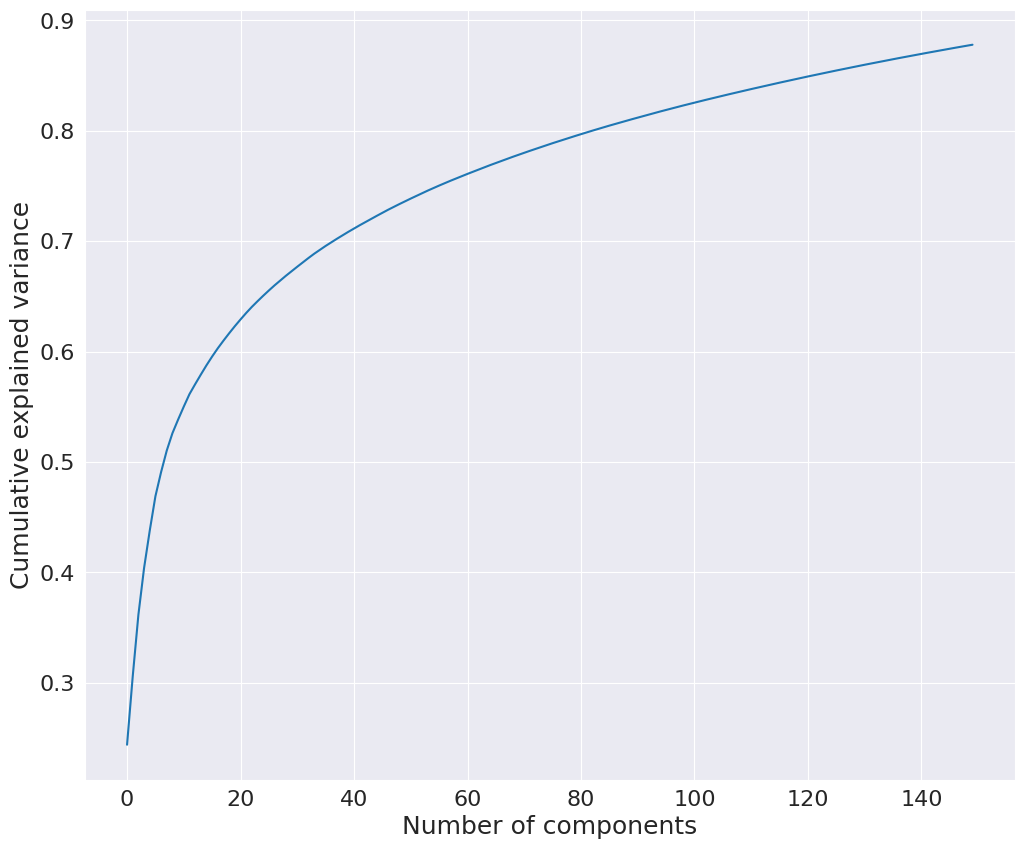

In [ ]:
#=========================
#PRINCIPAL COMPONENTS PLOT
#=========================

plt.figure(figsize=(12, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components',fontsize=18)
plt.ylabel('Cumulative explained variance',fontsize=18);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [ ]:
#================================
#COMPUTE THE NUMBER OF COMPONENTS
#================================

pca = RandomizedPCA(0.95).fit(X) #95%
components = pca.transform(X)
projected = pca.inverse_transform(components)


Text(0, 0.5, '150-dim\nreconstruction')

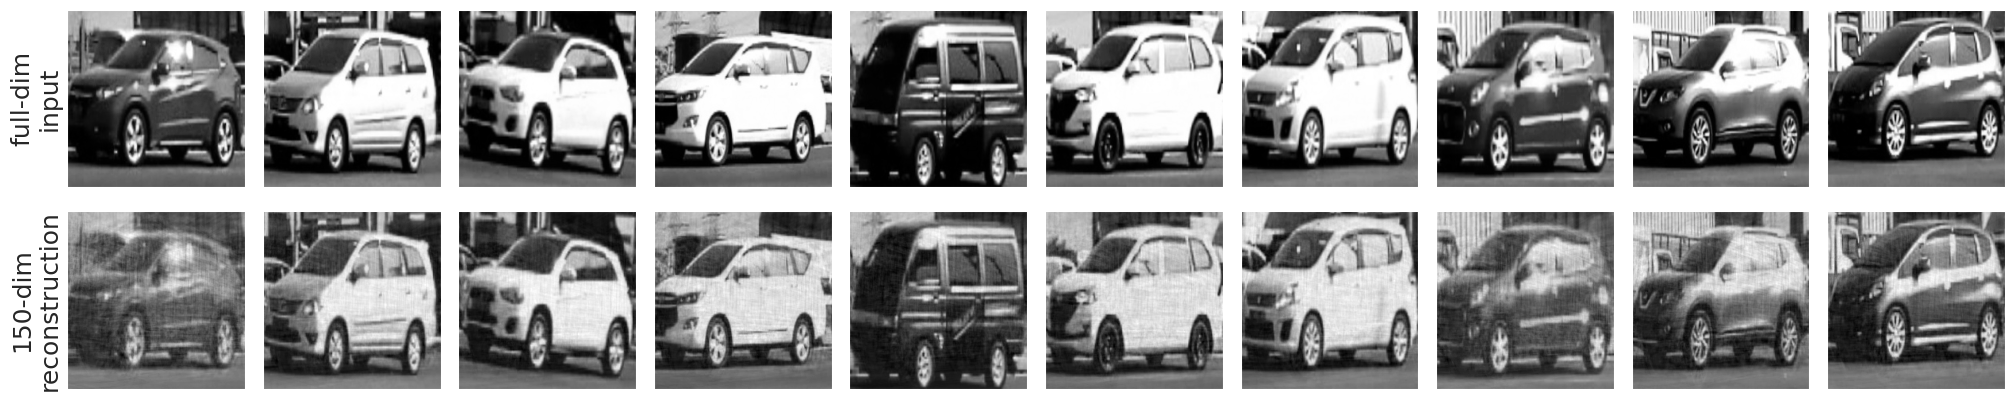

In [ ]:
#=======================================
#DIMENSIONAL RECONSTRUCTED OUTPUT PLOT
#=======================================
fig, ax = plt.subplots(2, 10, figsize=(25, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(X[i].reshape(224,224), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(224, 224), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput', fontsize=18)
ax[1, 0].set_ylabel('150-dim\nreconstruction',fontsize=18)

In [ ]:
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from keras.layers import Activation, Dropout, BatchNormalization, Dense
from keras.metrics import categorical_crossentropy
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
import pandas as pds
import random
import time

In [ ]:
#HELPFUL RESOURCES:
#https://towardsdatascience.com/bayesian-hyper-parameter-optimization-neural-networks-tensorflow-facies-prediction-example-f9c48d21f795
#https://github.com/shibuiwilliam/keras_gpyopt/blob/master/bopt_nn.ipynb
#https://github.com/toantm/keras-bda/blob/master/da_lenet5_mnist.py
#https://www.blopig.com/blog/wp-content/uploads/2019/10/GPyOpt-Tutorial1.html
#https://nanonets.com/blog/hyperparameter-optimization/ Optimizacion de hiperparametros
# print (projected)
# prokjected2 = projected
# import sys
# import numpy
# numpy.set_printoptions(prokjected2=sys.maxsize)
# trainingsetDA= np.reshape(projected, (224, 224,1)) #Input reshape 2D -> 3D
# shape = projected.shape
# img_r = projected.reshape((shape[0], shape[1], 1)) #input 3D -> 2D reshape
# print (img_r)
trainingsetDA= projected.reshape (projected.shape[0], 224, 224, 1) #Input reshape 2D -> 3D
print (trainingsetDA)

[[[[ 2.61620995e-03]
   [ 2.67423445e-03]
   [ 2.72286542e-03]
   ...
   [ 1.73940763e-03]
   [ 1.79865888e-03]
   [ 1.95635597e-03]]

  [[ 2.57462118e-03]
   [ 2.71196071e-03]
   [ 2.76791805e-03]
   ...
   [ 1.83042551e-03]
   [ 1.78785170e-03]
   [ 1.92263886e-03]]

  [[ 2.62167812e-03]
   [ 2.70617605e-03]
   [ 2.79127399e-03]
   ...
   [ 1.84253421e-03]
   [ 1.86243497e-03]
   [ 1.96716867e-03]]

  ...

  [[ 1.57564938e-03]
   [ 1.56043167e-03]
   [ 1.59924979e-03]
   ...
   [ 1.34528363e-03]
   [ 1.38229474e-03]
   [ 1.36224214e-03]]

  [[ 1.54090728e-03]
   [ 1.53661869e-03]
   [ 1.56096269e-03]
   ...
   [ 1.35928312e-03]
   [ 1.37074552e-03]
   [ 1.36253574e-03]]

  [[ 1.58939126e-03]
   [ 1.57114574e-03]
   [ 1.62041217e-03]
   ...
   [ 1.34497016e-03]
   [ 1.35524560e-03]
   [ 1.38658246e-03]]]


 [[[ 9.30547709e-04]
   [ 2.27115949e-03]
   [ 2.99124604e-03]
   ...
   [ 1.00381253e-03]
   [ 1.04508931e-03]
   [ 1.05984749e-03]]

  [[ 1.01936115e-03]
   [ 2.30292839e-03]
   [

In [ ]:
def relu_bn(inputs: Tensor) -> Tensor:
    relu = ReLU()(inputs)
    bn = BatchNormalization()(relu)
    return bn


#==================
#RESIDUAL BLOCKS
#==================

def residual_block(x: Tensor, downsample: bool, filters: int, kernel_size: int = 3) -> Tensor:
    y = Conv2D(kernel_size=kernel_size,
               strides= (1 if not downsample else 2),
               filters=filters,
               padding="same")(x)
    y = relu_bn(y)
    y = Conv2D(kernel_size=kernel_size,
               strides=1,
               filters=filters,
               padding="same")(y)

    if downsample:
        x = Conv2D(kernel_size=1,
                   strides=2,
                   filters=filters,
                   padding="same")(x)
    out = Add()([x, y])
    out = relu_bn(out)
    return out

In [ ]:
class RESNET():
#======================================================
#DATA AUGMENTATION OPERATIONS AND MODEL HYPERPARAMETERS
#======================================================
    def __init__(self,
                adam_lr=1e-4,
                rotation_range = 90,
                zoom_range = 0.5,
                width_shift_range=0.5,
                height_shift_range=0.5,
                horizontal_flip = True,
                vertical_flip=False,
                batch_size=1,
                epochs=250,
                kernel_size=3):

        self.adam_lr = adam_lr #learning rate
        self.rotation_range = rotation_range
        self.zoom_range = zoom_range
        self.width_shift_range=width_shift_range
        self.height_shift_range=height_shift_range
        self.horizontal_flip = horizontal_flip
        self.vertical_flip= vertical_flip
        self.batch_size = batch_size
        self.epochs = epochs
        self.kernel_size = kernel_size
        self.__datagen = self.data_augmentation()
        self.__model = self.resnet_model()




    def residual_block(self, x: Tensor, downsample: bool, filters: int, kernel_size: int = 3) -> Tensor: #Tamano del filtro 3x3
        y = Conv2D(kernel_size=kernel_size,
                   strides= (1 if not downsample else 2),
                   filters=filters,
                   padding="same")(x)
        y = relu_bn(y)
        y = Conv2D(kernel_size=self.kernel_size,
                   strides=1,
                   filters=filters,
                   padding="same")(y)

        if downsample:
            x = Conv2D(kernel_size=self.kernel_size,
                     strides=2,
                     filters=filters,
                     padding="same")(x)
        out = Add()([x, y])
        out = relu_bn(out)
        return out

#=================
#ResNet Model def
#=================

    def resnet_model(self):
        inputs = Input(shape=(224,224, 1))
        num_filters = 64
        t = BatchNormalization()(inputs)
        t = Conv2D(kernel_size= self.kernel_size , strides= 1, filters=num_filters, padding="same")(t)
        t = relu_bn(t)
        num_blocks_list = [2, 5, 5, 2] #14 residual blocks
        for i in range(len(num_blocks_list)):
          num_blocks = num_blocks_list[i]
          for j in range(num_blocks):
            t = residual_block(t, downsample=(j==0 and i!=0), filters=num_filters)
        num_filters *= 2

        t = AveragePooling2D(4)(t)
        t = Flatten()(t)
        outputs = Dense(3, activation='softmax')(t)

        model = Model(inputs, outputs)

        model.compile(optimizer=Adam(learning_rate=self.adam_lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

    def data_augmentation(self):
        datagen = ImageDataGenerator(
        rotation_range =self.rotation_range,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = self.zoom_range, # Randomly zoom image
        width_shift_range= self.width_shift_range,  # randomly shift images horizontally (fraction of total width)
        height_shift_range= self.height_shift_range,  # randomly shift images vertically (fraction of total height)
        horizontal_flip =self.horizontal_flip,  # randomly flip images
        vertical_flip=self.vertical_flip)  # randomly flip images
        datagen.fit(trainingsetDA)#input fir must 4d (num_sample, image_res, Image_res, 1)(var.shape[0],224,224,1)
        return datagen

#=================
#ResNet Model fit
#=================
    def resnet_fit(self):
        history = self.__model.fit(self.__datagen.flow(trainingsetDA,y_train, batch_size=self.batch_size),
                            epochs=self.epochs,verbose=1, validation_data=(x_val, y_val),
                            callbacks=[])
#===============================
#ResNet Model metrics evaluation
#===============================
    def resnet_evaluate(self):
        self.resnet_fit()
        evaluation = self.__model.evaluate(x_val,y_val, batch_size=self.batch_size, verbose=0)
        return evaluation

In [ ]:
#===============================
#Running ResNet Class
#===============================
def run_RESNET (adam_lr=3e-4,
                rotation_range = 90,  # randomly rotate images in the range (degrees, 0 to 180)
                zoom_range = 0.5, # Randomly zoom image
                width_shift_range=0.5,  # randomly shift images horizontally (fraction of total width)
                height_shift_range=0.5,  # randomly shift images vertically (fraction of total height)
                horizontal_flip = True,  # randomly flip images
                vertical_flip=False, # randomly flip images
                batch_size=1,
                epochs=250,
                kernel_size=3):

    _resnet = RESNET(adam_lr = adam_lr,
                     rotation_range = rotation_range,
                     zoom_range = zoom_range,
                     width_shift_range=width_shift_range,
                     height_shift_range=height_shift_range,
                     horizontal_flip = horizontal_flip,
                     vertical_flip= vertical_flip,
                     batch_size = batch_size,
                     epochs = epochs,
                     kernel_size = kernel_size)
    resnet_evaluation = _resnet.resnet_evaluate()
    return resnet_evaluation

In [ ]:
#===============================
#EXPERIMENT BOUNDS (SMALL)
#===============================
bounds = [{'name': 'adam_lr',    'type': 'continuous',    'domain': (3e-4, 1e-5)},
          {'name': 'rotation_range',                         'type': 'continuous',    'domain': (0, 90)},
          {'name': 'zoom_range',                             'type': 'continuous',    'domain': (0.0,0.5)},
          {'name': 'width_shift_range',                      'type': 'continuous',    'domain': (0.0,0.5)},
          {'name': 'height_shift_range',                     'type': 'continuous',    'domain': (0.0,0.5)},
          {'name': 'horizontal_flip',                        'type': 'categorical',   'domain': (True, False)},
          {'name': 'vertical_flip',                          'type': 'categorical',   'domain': (True, False)},
          {'name': 'batch_size',       'type': 'discrete',    'domain': (1, 2, 3)},
          {'name': 'epochs',           'type': 'discrete',    'domain': (200,250)},
          {'name': 'kernel',           'type': 'discrete',    'domain': (1,3,5)}]


In [ ]:
#===============================
#STATING BOUNDS DTYPES
#===============================
def f(x):
    print(x)
    evaluation = run_RESNET(
        adam_lr = float(x[:,0]),
        rotation_range = int(x[:,1]),
        zoom_range = float(x[:,2]),
        width_shift_range = float(x[:,3]),
        height_shift_range = float(x[:,4]),
        horizontal_flip = int(x[:,5]),
        vertical_flip = int(x[:,6]),
        batch_size = int(x[:,7]),
        epochs = int(x[:,8]),
        kernel_size = int(x[:,9]),
        )

    print("LOSS:\t{0} \t ACCURACY:\t{1}".format(evaluation[0], evaluation[1])) #METRICS PRINT
    print(evaluation)
    return evaluation[0]

In [ ]:
#===========================
#TRAINING AND TESTING SHAPES
#===========================

x_train= np.reshape(x_train_normalized, (400, 224, 224,1))
x_test= np.reshape(x_test, (100, 224, 224,1))

#Training
print('x_train set shape>>>>',x_train.shape)
print('y_train set shape>>>>',y_train.shape)

#Testing
print('x_test set shape>>>>',x_test.shape)
print('y_test set shape>>>>',y_test.shape)

x_train set shape>>>> (400, 224, 224, 1)
y_train set shape>>>> (400,)
x_test set shape>>>> (100, 224, 224, 1)
y_test set shape>>>> (100,)


In [ ]:
#==========================================================
#DATA AUGMENTATION OPERATIONS WITH OPTIMAL HYPERPARAMETERS
#==========================================================
datagen = ImageDataGenerator(
        rotation_range = 190.7809510335889,
        zoom_range = 0.347686203808678,
        width_shift_range= 0.07712976589332243,
        height_shift_range= -0.04710934652942281,
        horizontal_flip = True,
        vertical_flip=False)

dgf=datagen.fit(x_train)

In [ ]:
#### MODEL OPTIMIZED HYPERPARAMETERS #####
adam_lr= 0.0002587553425186625           #
batch_size=3                             #
epochs=300                               #
##########################################


def relu_bn(inputs: Tensor) -> Tensor:
    relu = ReLU()(inputs)
    bn = BatchNormalization()(relu)
    return bn

def residual_block(x: Tensor, downsample: bool, filters: int, kernel_size: int = 3) -> Tensor:
    y = Conv2D(kernel_size= 1,
               strides= (1 if not downsample else 2),
               filters=filters,
               padding="same")(x)
    y = relu_bn(y)
    y = Conv2D(kernel_size= 3,
               strides=1,
               filters=filters,
               padding="same")(y)

    if downsample:
        x = Conv2D(kernel_size=1,
                   strides=2,
                   filters=filters,
                   padding="same")(x)
    out = Add()([x, y])
    out = relu_bn(out)
    return out


def create_res_net():

    inputs = Input(shape=(224,224,1))
    num_filters = 64

    t = BatchNormalization()(inputs)
    t = Conv2D(kernel_size=1,
               strides=1,
               filters=num_filters,
               padding="same")(t)
    t = relu_bn(t)

    num_blocks_list = [2, 5, 5, 2]
    for i in range(len(num_blocks_list)):
        num_blocks = num_blocks_list[i]
        for j in range(num_blocks):
            t = residual_block(t, downsample=(j==0 and i!=0), filters=num_filters)
        num_filters *= 2

    t = AveragePooling2D(4)(t)
    t = Flatten()(t)
    outputs = Dense(5, activation='softmax')(t)

    model = Model(inputs, outputs)
    model.compile(
        optimizer=Adam(learning_rate=adam_lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [ ]:
#=========
#ResNet
#========
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
import datetime
import time
inicio = time.time()

(x_train, y_train), (x_test, y_test) = (x_train,y_train),(x_test, y_test)

model = create_res_net()  #ResNet
model.summary()

timestr = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
name = 'RESNET'+timestr

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 batch_normalization (BatchNorm  (None, 224, 224, 1)  4          ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 64  128         ['batch_normalization[0][0]']    
                                )                                                             

In [ ]:
#######################################MODEL CHECKPOINTS ###########################################################
checkpoint_path = "/content/gdrive/My Drive/UNUSIDA/Weigths"+name+"/_weights.{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint_dir = os.path.dirname(checkpoint_path)
os.system('mkdir {}'.format(checkpoint_dir))

cp_callback = ModelCheckpoint(
    filepath= checkpoint_path ,save_weights_only=True, monitor='val_loss',mode='min',
     verbose=0, save_best_only=True  # will show you nothing (silent), solo se almacenan los mejores resultados
)
#####################################################################################################################


tensorboard_callback = TensorBoard(
    log_dir='tensorboard_logs/'+name,
    histogram_freq=1
)

In [ ]:
from tensorflow.keras.optimizers.legacy import Adam
early_stopping = EarlyStopping(patience=200, verbose=1,restore_best_weights=True)
history = model.fit(datagen.flow(
    x=x_train,
    y=y_train, batch_size=batch_size),
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),

    callbacks=[early_stopping, cp_callback, tensorboard_callback]
)
fin = time.time()
print('Compilation time in seconds >>>> ', fin-inicio)

Epoch 1/300
134/134 [==============================] - 2254s 17s/step - loss: 2.1865 - accuracy: 0.3525 - val_loss: 6.3305 - val_accuracy: 0.2000
Epoch 2/300
134/134 [==============================] - 2220s 17s/step - loss: 3.1165 - accuracy: 0.3750 - val_loss: 12.6464 - val_accuracy: 0.2000
Epoch 3/300
134/134 [==============================] - 2220s 17s/step - loss: 3.3583 - accuracy: 0.3800 - val_loss: 91.8688 - val_accuracy: 0.2000
Epoch 4/300
134/134 [==============================] - 2207s 16s/step - loss: 3.3593 - accuracy: 0.3450 - val_loss: 12.8753 - val_accuracy: 0.3400
Epoch 5/300
134/134 [==============================] - 2212s 17s/step - loss: 3.3157 - accuracy: 0.3500 - val_loss: 8.3005 - val_accuracy: 0.1900
Epoch 6/300
134/134 [==============================] - 2201s 16s/step - loss: 3.3134 - accuracy: 0.3575 - val_loss: 53.9570 - val_accuracy: 0.2200
Epoch 7/300
134/134 [==============================] - 2174s 16s/step - loss: 3.1536 - accuracy: 0.3800 - val_loss: 5.02

In [ ]:
# #===============================
# #MODEL INITIAL POINTS
# #===============================
# from tensorflow.keras.optimizers.legacy import Adam
# !pip install tensorflow==2.7
# # !python3 -m pip install tensorflow-macos==2.5.0
# inicio = time.time()

# import tensorflow as tf

# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu',input_shape=(256, 256, 3)),
#     tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
#     tf.keras.layers.MaxPool2D(pool_size=(2,2)),
#     tf.keras.layers.BatchNormalization(axis=-1),

#     tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
#     tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
#     tf.keras.layers.MaxPool2D(pool_size=(2,2)),
#     tf.keras.layers.BatchNormalization(axis=-1),

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512,activation='relu'),
#     tf.keras.layers.BatchNormalization() ,
#     tf.keras.layers.Dropout(rate=0.5),

#     tf.keras.layers.Dense(3,activation='softmax')

# ])

# pbounds = {"C": [0.1, 10]}
# print (inicio)
# print (GPyOpt)
# opt_resnet = GPyOpt.methods.BayesianOptimization(f=f, domain=bounds, initial_design_numdata= 20, Initial_design_numdata='latin')
# opt_resnet2 = GPyOpt.methods.BayesianOptimization(f = f, domain=bounds,
#                                  pbounds = pbounds, verbose = 2,
#                                  random_state = 4)


# #===============================
# #MODEL OPTIMIZER
# #===============================
# BayesianOpt = opt_resnet.run_optimization(max_iter=150)
# opt_resnet.save_evaluations("ev_file")

# #===============================
# #PRINTING RESULTS
# #===============================
# print("""
# Optimized Parameters:
# \t{0}:\t{1}
# \t{2}:\t{3}
# \t{4}:\t{5}
# \t{6}:\t{7}
# \t{8}:\t{9}
# \t{10}:\t{11}
# \t{12}:\t{13}
# \t{14}:\t{15}
# \t{16}:\t{17}
# \t{18}:\t{19}
# """.format(bounds[0]["name"],opt_resnet.x_opt[0],
#            bounds[1]["name"],opt_resnet.x_opt[1],
#            bounds[2]["name"],opt_resnet.x_opt[2],
#            bounds[3]["name"],opt_resnet.x_opt[3],
#            bounds[4]["name"],opt_resnet.x_opt[4],
#            bounds[5]["name"],opt_resnet.x_opt[5],
#            bounds[6]["name"],opt_resnet.x_opt[6],
#            bounds[7]["name"],opt_resnet.x_opt[7],
#            bounds[8]["name"],opt_resnet.x_opt[8],
#            bounds[9]["name"],opt_resnet.x_opt[9]))
# print("optimized loss: {0}".format(opt_resnet.fx_opt))

# fin = time.time()
# print(fin-inicio)